In [ ]:

!pip install lightfm

In [ ]:
import pandas as pd
likes_df = pd.read_csv("likes.csv") #Tập dữ liệu người dùng đã like bài thơ nào (không có điểm đánh giá)
ratings_df = pd.read_csv("ratings.csv") #Tập dữ liệu người dùng đã đánh giá (rating) bài thơ với điểm số từ 1 → 5
poems_df = pd.read_csv("poems.csv")

# Hiển thị toàn bộ bảng
print("📄 Likes")
display(likes_df)
print("\n📄 Ratings")
display(ratings_df)
print("📄 Poems")
display(poems_df)

poems_df = poems_df[["id", "title"]]  # Chỉ cần 2 cột
poems_df = poems_df.rename(columns={"id": "poem_id"})



📄 Likes


,user,poems
0,2,"[205, 50, 338, 11208, 108, 1461, 156, 30, 545,..."
1,47,"[24077, 24062, 24078, 24080]"
2,57,[4605]
3,62,[10533]
4,71,"[2929, 2920, 2918, 1420, 2004, 2005, 2343, 201..."
...,...,...
13953,171605,[6959]
13954,171617,"[27911, 23166, 1243]"
13955,171682,"[2438, 3332, 94, 62, 92, 93, 131, 110, 1230, 1..."
13956,171695,[115]



📄 Ratings


,user,poems
0,1,"[{'id': 4417, 'score': 5}]"
1,663,"[{'id': 55217, 'score': 1}, {'id': 4697, 'scor..."
2,474,"[{'id': 7566, 'score': 5}]"
3,880,"[{'id': 40946, 'score': 5}, {'id': 36079, 'sco..."
4,2663,"[{'id': 4768, 'score': 5}, {'id': 138, 'score'..."
...,...,...
289,171539,"[{'id': 38566, 'score': 5}]"
290,171557,"[{'id': 26669, 'score': 5}]"
291,171561,"[{'id': 5305, 'score': 1}]"
292,171617,"[{'id': 27911, 'score': 5}, {'id': 23166, 'sco..."


📄 Poems


,id,title,poster,postDate,type,lang,groups,keywords,author
0,1,Buổi chiều lữ thứ,2,2004-05-31T12:23:02.000Z,7.0,1.0,[],"['""thơ sách giáo khoa""', '""Văn học 9 [1990-200...","{'id': 1, 'country': 2, 'age': 57, 'yob': 1805..."
1,2,Tức cảnh chiều thu,2,2004-05-31T12:23:21.000Z,7.0,1.0,[],"['""mùa thu""', '""tác giả tồn nghi""']","{'id': 1, 'country': 2, 'age': 57, 'yob': 1805..."
2,4,Chùa Trấn Bắc,2,2004-05-31T12:23:55.000Z,7.0,1.0,[],"['""cảnh chùa""', '""chùa Trấn Quốc""', '""tác giả ...","{'id': 1, 'country': 2, 'age': 57, 'yob': 1805..."
3,3,Chiều hôm nhớ nhà,2,2004-05-31T12:23:39.000Z,7.0,1.0,[],"['""nhớ nhà""', '""tha hương""']","{'id': 1, 'country': 2, 'age': 57, 'yob': 1805..."
4,5,Qua đèo Ngang,2,2004-05-31T12:24:21.000Z,7.0,1.0,[],"['""đèo Ngang""', '""Ngữ văn 7 [2003-2017]""', '""t...","{'id': 1, 'country': 2, 'age': 57, 'yob': 1805..."
...,...,...,...,...,...,...,...,...,...
94414,106668,Chỉ còn mây trắng bay,159238,2023-09-16T00:02:47.000Z,16.0,1.0,[],[],"{'id': 4514, 'country': 2, 'age': 3, 'yob': 19..."
94415,106669,Tìm lại khúc trăng xưa,159238,2023-09-16T00:04:44.000Z,18.0,1.0,[],[],"{'id': 4514, 'country': 2, 'age': 3, 'yob': 19..."
94416,106670,Khi nghe sóng từ trường,159238,2023-09-16T00:07:10.000Z,13.0,1.0,[],[],"{'id': 4514, 'country': 2, 'age': 3, 'yob': 19..."
94417,106671,Tôi chỉ là người làm thơ,159238,2023-09-16T00:09:34.000Z,20.0,1.0,[],[],"{'id': 4514, 'country': 2, 'age': 3, 'yob': 19..."


In [ ]:
#Import các thư viện cần thiết
import ast
from sklearn.preprocessing import LabelEncoder #Mã hóa ID người dùng & bài thơ từ dạng chuỗi → số liên tục
from scipy.sparse import coo_matrix #Tạo ma trận thưa từ dữ liệu – dùng để lưu tương tác user-bài thơ
from lightfm import LightFM #Mô hình học máy chính: dùng để huấn luyện hệ thống gợi ý
from lightfm.cross_validation import random_train_test_split #Tách dữ liệu thành tập huấn luyện & kiểm tra (train/test)
from lightfm.evaluation import precision_at_k, recall_at_k #Đánh giá chất lượng gợi ý bằng chỉ số Precision@K



In [ ]:
#Preprocessing Likes
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []  # Or any other default value you want to use for invalid entries

likes_df["poems"] = likes_df["poems"].apply(safe_literal_eval) #Chuyển cột "poems" từ chuỗi JSON → list Python thực
likes_expanded = likes_df.explode("poems").rename(columns={"poems": "poem_id"}) #Tách mỗi phần tử trong list thành một dòng riêng
likes_expanded["value"] = 1 #Gán giá trị tương tác = 1 cho mỗi bài thơ được like
likes_expanded["source"] = "like" #Thêm cột "source" để sau này biết dòng này là từ likes.csv
print("📊 Dữ liệu likes_expanded (sau explode):")
display(likes_expanded.head(10))

📊 Dữ liệu likes_expanded (sau explode):


,user,poem_id,value,source
0,2,205,1,like
0,2,50,1,like
0,2,338,1,like
0,2,11208,1,like
0,2,108,1,like
0,2,1461,1,like
0,2,156,1,like
0,2,30,1,like
0,2,545,1,like
0,2,182,1,like


In [ ]:
#Preprocessing ratings
#ratings_df["poems"] = ratings_df["poems"].apply(ast.literal_eval) #chuyển chuỗi JSON → list Python
ratings_df["poems"] = ratings_df["poems"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x) #Handling literal_eval only when it's safe
ratings_expanded = ratings_df.explode("poems") #Mỗi phần tử trong list (tức 1 bài thơ) tách thành 1 dòng riêng
ratings_expanded = pd.concat([
    ratings_expanded[["user"]],
    ratings_expanded["poems"].apply(pd.Series)  #Gộp cột "user" với 2 cột mới "poem_id" và "value" thành 1 bảng hoàn chỉnh
], axis=1).rename(columns={"id": "poem_id", "score": "value"}) #Đổi tên cột cho đồng nhất với bảng likes_expanded
ratings_expanded["source"] = "rating" #Thêm cột "source" để biết dòng đó là từ rating
print("📊 Dữ liệu ratings_expanded (sau explode):")
display(ratings_expanded)

📊 Dữ liệu ratings_expanded (sau explode):


,user,poem_id,value,source
0,1,4417.0,5.0,rating
1,663,55217.0,1.0,rating
1,663,4697.0,5.0,rating
1,663,11223.0,5.0,rating
1,663,104843.0,5.0,rating
...,...,...,...,...
290,171557,26669.0,5.0,rating
291,171561,5305.0,1.0,rating
292,171617,27911.0,5.0,rating
292,171617,23166.0,5.0,rating


In [ ]:
#Gộp và làm sạch dữ liệu tương tác
interactions_df = pd.concat([
    likes_expanded[["user", "poem_id", "value", "source"]],
    ratings_expanded[["user", "poem_id", "value", "source"]] #Gộp likes_expanded và ratings_expanded lại thành một bảng duy nhất
], ignore_index=True).rename(columns={"user": "user_id"}) #Đổi tên cột "user" thành "user_id" để thống nhất tên biến

interactions_df = interactions_df.dropna(subset=["user_id", "poem_id", "value"]) #Xoá các dòng có thiếu thông tin (NaN) trong các cột quan trọng
interactions_df = interactions_df[
    interactions_df["value"].apply(lambda x: pd.notna(x) and pd.api.types.is_number(x) and abs(x) != float('inf'))
]   #Dòng có giá trị value không hợp lệ (ví dụ: NaN, inf, "abc"),Đảm bảo chỉ giữ các số hợp lệ
interactions_df["value"] = interactions_df["value"].astype(float)  #Chuyển cột value về kiểu số thực để mô hình có thể xử lý
print(interactions_df["user_id"].unique())
display(interactions_df)



[     2     47     57 ... 171539 171561 171694]


,user_id,poem_id,value,source
0,2,205,1.0,like
1,2,50,1.0,like
2,2,338,1.0,like
3,2,11208,1.0,like
4,2,108,1.0,like
...,...,...,...,...
47151,171557,26669.0,5.0,rating
47152,171561,5305.0,1.0,rating
47153,171617,27911.0,5.0,rating
47154,171617,23166.0,5.0,rating


In [ ]:
#Encode ID
user_encoder = LabelEncoder()
poem_encoder = LabelEncoder()
interactions_df["user_idx"] = user_encoder.fit_transform(interactions_df["user_id"]) #Mã hoá tất cả user ID thành số thứ tự
interactions_df["poem_idx"] = poem_encoder.fit_transform(interactions_df["poem_id"]) #Mã hoá tất cả poem ID thành số thứ tự
# Xem 10 dòng đầu sau khi mã hóa user và poem
print("📊 interactions_df sau khi Label Encoding:")
display(interactions_df[["user_id", "poem_id", "value", "user_idx", "poem_idx", "source"]])

📊 interactions_df sau khi Label Encoding:


,user_id,poem_id,value,user_idx,poem_idx,source
0,2,205,1.0,1,177,like
1,2,50,1.0,1,45,like
2,2,338,1.0,1,265,like
3,2,11208,1.0,1,5304,like
4,2,108,1.0,1,99,like
...,...,...,...,...,...,...
47151,171557,26669.0,5.0,14067,9370,rating
47152,171561,5305.0,1.0,14069,3013,rating
47153,171617,27911.0,5.0,14073,9671,rating
47154,171617,23166.0,5.0,14073,8428,rating


In [ ]:
#Encode ID
user_encoder = LabelEncoder()
poem_encoder = LabelEncoder()
interactions_df["user_idx"] = user_encoder.fit_transform(interactions_df["user_id"]) #Mã hoá tất cả user ID thành số thứ tự
interactions_df["poem_idx"] = poem_encoder.fit_transform(interactions_df["poem_id"]) #Mã hoá tất cả poem ID thành số thứ tự
# Xem 10 dòng đầu sau khi mã hóa user và poem
print("📊 interactions_df sau khi Label Encoding:")
display(interactions_df[["user_idx", "poem_idx", "value", "source"]])

📊 interactions_df sau khi Label Encoding:


,user_idx,poem_idx,value,source
0,1,177,1.0,like
1,1,45,1.0,like
2,1,265,1.0,like
3,1,5304,1.0,like
4,1,99,1.0,like
...,...,...,...,...
47151,14067,9370,5.0,rating
47152,14069,3013,1.0,rating
47153,14073,9671,5.0,rating
47154,14073,8428,5.0,rating


In [ ]:
from scipy.sparse import coo_matrix
import pandas as pd

# Bước 1: Gộp dữ liệu - Ưu tiên rating nếu có
interactions_df_grouped = interactions_df.groupby(["user_idx", "poem_idx"]).agg({
    "value": "max",  # hoặc "sum" nếu muốn cộng like + rating
    "source": lambda x: "rating" if "rating" in list(x) else "like"
}).reset_index()

# Bước 2: Tạo interaction matrix từ dữ liệu đã gộp
interaction_matrix = coo_matrix(
    (
        interactions_df_grouped["value"],
        (interactions_df_grouped["user_idx"], interactions_df_grouped["poem_idx"])
    )
)

# Bước 3: Tạo bảng tương tác để phân tích
interaction_df = pd.DataFrame({
    "user_idx": interaction_matrix.row,
    "poem_idx": interaction_matrix.col,
    "value": interaction_matrix.data,
    "source": interactions_df_grouped.loc[interaction_matrix.row, "source"].reset_index(drop=True)
})

# Bước 4: Lấy mỗi loại 10 dòng
like_part = interaction_df[interaction_df["source"] == "like"].head(5)
rating_part = interaction_df[interaction_df["source"] == "rating"].head(5)

# Bước 5: Gộp 2 bảng lại thành một, xen kẽ
combined_df = pd.concat([like_part, rating_part], ignore_index=True)

# Bước 6: Hiển thị kết quả
print("Gộp 10 dòng 'like' và 10 dòng 'rating' vào cùng một bảng:")
display(combined_df)


Gộp 10 dòng 'like' và 10 dòng 'rating' vào cùng một bảng:


,user_idx,poem_idx,value,source
0,1,1,1.0,like
1,1,3,1.0,like
2,1,6,1.0,like
3,1,7,1.0,like
4,1,8,1.0,like
5,0,2462,5.0,rating
6,509,2778,1.0,rating
7,509,7505,1.0,rating
8,509,8108,1.0,rating
9,704,375,1.0,rating


In [ ]:
#Train/Test Split và Huấn luyện mô hình
train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=96) #giữ lại 20% dữ liệu để kiểm tra

model = LightFM(loss="warp", no_components=128) #Tạo mô hình LightFm
model.fit(train, epochs=500, num_threads=4) #Huấn luyện mô hình trong 500 vòng lặp (epochs), tận dụng 2 CPU để tăng tốc

train_precision = precision_at_k(model, train, k=2).mean()  #Đánh giá độ chính xác trong top-5 gợi ý, mean là lấy trung bình trong all user
test_precision = precision_at_k(model, test, k=2).mean()
train_recall = recall_at_k(model, train, k=800).mean() #Tỷ lệ số bài gợi ý đúng trong top-k / tổng số bài thực sự tương tác
test_recall = recall_at_k(model, test, k=10000).mean()
print(f" Precision@2 : {train_precision:.4f}")
print(f" Recall@{800} (train): {train_recall:.4f}")
print(f" Recall@{10000} (test): {test_recall:.4f}")


 Precision@2 : 0.6592
 Recall@800 (train): 1.0000
 Recall@10000 (test): 0.7570


In [ ]:
from lightfm import LightFM
from lightfm.evaluation import precision_at_k, recall_at_k
from lightfm.cross_validation import random_train_test_split
import numpy as np

# Tham số lặp
num_runs = 10
k_precision = 2
k_recall = 10000

# Danh sách lưu kết quả
precisions = []
recalls = []

for i in range(num_runs):
    #  Chia lại train/test mỗi lần
    train, test = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=96)

    # Huấn luyện mô hình mới mỗi lần
    model = LightFM(loss="warp", no_components=128)
    model.fit(train, epochs=500, num_threads=4)

    # Đánh giá mô hình
    p = precision_at_k(model, train, k=k_precision).mean()
    r = recall_at_k(model, test, k=k_recall).mean()

    precisions.append(p)
    recalls.append(r)

# Tính trung bình
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

print(f" Precision@{k_precision} trung bình sau {num_runs} lần: {avg_precision:.4f}")
print(f" Recall@{k_recall} trung bình sau {num_runs} lần: {avg_recall:.4f}")


 Precision@2 trung bình sau 10 lần: 0.6592
 Recall@10000 trung bình sau 10 lần: 0.7577


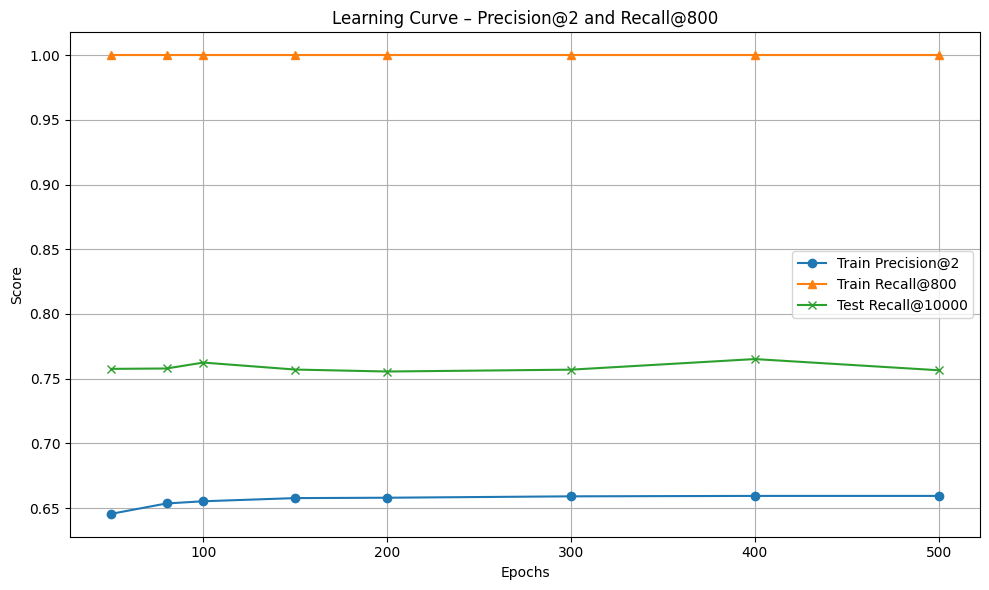

In [ ]:
from lightfm import LightFM
from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import precision_at_k, recall_at_k
import matplotlib.pyplot as plt
import numpy as np

# Giả sử đã có interaction_matrix
train_data, test_data = random_train_test_split(interaction_matrix, test_percentage=0.2, random_state=42)

epoch_list = [50, 80, 100, 150, 200, 300, 400, 500]
train_precisions, test_precisions = [], []
train_recalls, test_recalls = [], []

for epoch in epoch_list:
    model = LightFM(loss='warp', no_components=128)
    model.fit(train_data, epochs=epoch, num_threads=4)

    train_precisions.append(precision_at_k(model, train_data, k=2).mean())
    test_precisions.append(precision_at_k(model, test_data, k=2).mean())
    train_recalls.append(recall_at_k(model, train_data, k=800).mean())
    test_recalls.append(recall_at_k(model, test_data, k=10000).mean())

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, train_precisions, 'o-', label='Train Precision@2')
plt.plot(epoch_list, train_recalls, '^-', label='Train Recall@800')
plt.plot(epoch_list, test_recalls, 'x-', label='Test Recall@10000')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Learning Curve – Precision@2 and Recall@800")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


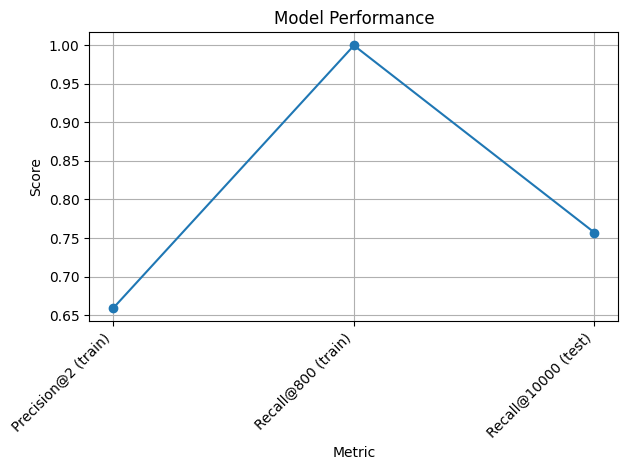

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Data for the plot
metrics = ['Precision@2 (train)', 'Recall@800 (train)', 'Recall@10000 (test)']
values = [train_precision, train_recall, test_recall]

# Create the plot
plt.plot(metrics, values, marker='o')
plt.title('Model Performance')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

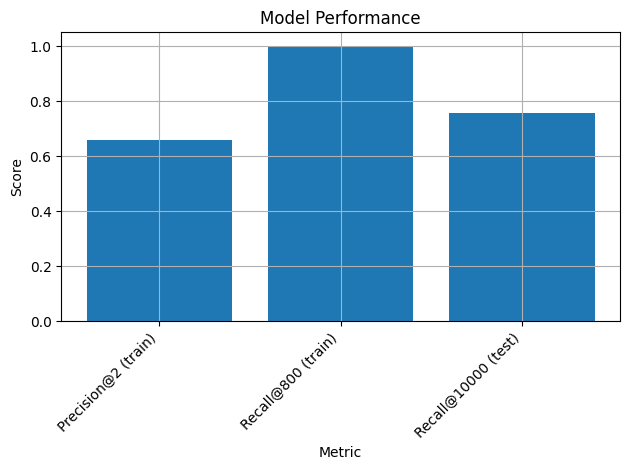

In [ ]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Data for the plot
metrics = ['Precision@2 (train)', 'Recall@800 (train)', 'Recall@10000 (test)']
values = [train_precision, train_recall, test_recall]

# Create the bar plot
plt.bar(metrics, values)  # Use plt.bar for bar chart
plt.title('Model Performance')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # You can remove grid lines if desired
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score
#precision_at_k: đo độ chính xác trong top-k gợi ý
#recall_at_k: đo độ bao phủ trong top-k
#auc_score: đo khả năng xếp hạng đúng item thích vs không thích (xấp xỉ MAP)

#hàm tính F1 score, giúp cân bằng giữa P và R
def compute_f1(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

#AUC = Area Under ROC Curve: đo xếp hạng tổng thể
def compute_map(model, train, test):
    train_auc = auc_score(model, train).mean() #dùng auc_score() làm gần đúng
    test_auc = auc_score(model, test).mean()
    return round(train_auc, 4), round(test_auc, 4) #sau đó trả về tập train và test của MAP

# Đổi các giá trị k nếu cần (ở đây là đánh giá top-10 gợi ý)
train_precision = precision_at_k(model, train, k=2).mean()
test_precision = precision_at_k(model, test, k=2).mean()
#Đánh giá khả năng bao phủ toàn bộ những gì người dùng đã tương tác
train_recall = recall_at_k(model, train, k=800).mean()
test_recall = recall_at_k(model, test, k=10000).mean()

train_f1 = compute_f1(train_precision, train_recall)
test_f1 = compute_f1(test_precision, test_recall)
train_map, test_map = compute_map(model, train, test)

print(f"F1-score@10 (train): {train_f1:.4f}")
print(f"F1-score@10 (test):  {test_f1:.4f}")
print(f"MAP (train, approx): {train_map:.4f}")
print(f"MAP (test, approx):  {test_map:.4f}")


F1-score@10 (train): 0.6563
F1-score@10 (test):  0.5173
MAP (train, approx): 0.9334
MAP (test, approx):  0.9374


In [ ]:
def recommend_poems(model, user_id, user_encoder, poem_encoder, interaction_matrix, N=5):
    import numpy as np

    if user_id not in user_encoder.classes_: #Kiểm tra user tồn tại
        print(" User ID không tồn tại trong dữ liệu.")
        return []

    user_idx = user_encoder.transform([user_id])[0] #Mã hóa user_id → user_idx
    n_items = interaction_matrix.shape[1]

    # Dự đoán score cho tất cả bài thơ:
    scores = model.predict(np.repeat(user_idx, n_items), np.arange(n_items))
    #Loại bỏ các bài thơ đã từng xem:
    known_items = interaction_matrix.tocsr()[user_idx].indices
    unseen_mask = np.ones(n_items, dtype=bool)
    unseen_mask[known_items] = False
    #Chọn top-N bài chưa đọc có score cao nhất:
    unseen_scores = scores[unseen_mask]
    unseen_indices = np.arange(n_items)[unseen_mask]
    #Lấy ra top N bài thơ có điểm cao nhất mà user chưa từng đọc
    top_indices = unseen_indices[np.argsort(-unseen_scores)][:N]
    #Giải mã lại poem_id và in kết quả:
    recommended_poems = poem_encoder.inverse_transform(top_indices)

    #  Tạo ánh xạ poem_id → title (sửa lỗi cảnh báo)
    poem_id_to_title = poems_df.set_index("poem_id")["title"].to_dict()

    print(f" Gợi ý {N} bài thơ cho user {user_id}:")
    for i, pid in enumerate(recommended_poems, 1):
        title = poem_id_to_title.get(pid, "(Không tìm thấy)")
        print(f"{i}. {pid} – {title}")

    return recommended_poems

In [ ]:
all_user_ids = interactions_df["user_id"].unique()
print("📋 Tất cả user_id:")
print(all_user_ids[:20]) #In ra 20 người dùng đầu tiên


📋 Tất cả user_id:
[  2  47  57  62  71  79   3   4  85  92  14  96 113 114 125 150 151 176
 191 193]


In [ ]:
# Rename the list variable to avoid conflict with the function name
recommended_poems_list = [1126, 83, 12, 1218, 7] # ... (rest of your list items)

# Then, when calling the recommendation function, use the original function name:
recommend_poems(
    model,
    user_id=92,
    user_encoder=user_encoder,
    poem_encoder=poem_encoder,
    interaction_matrix=interaction_matrix,
    N=5
)

 Gợi ý 5 bài thơ cho user 92:
1. 4104 – Ngọc giai oán
2. 1752 – Bạch đầu ngâm
3. 6709 – Chút quà đông
4. 13 – Hoàng Hạc lâu tống Mạnh Hạo Nhiên chi Quảng Lăng
5. 1554 – Tô mạc già


array([4104, 1752, 6709, 13, 1554], dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score #hàm accuracy_score để đo tỷ lệ dự đoán đúng trong các cặp user-poem

# Lấy mẫu ngẫu nhiên 1000 cặp user-item để kiểm thử
#Lấy số lượng người dùng (n_users) và số lượng bài thơ (n_items)
#từ ma trận tương tác thưa đã tạo trước đó (dùng coo_matrix).
import numpy as np
n_users, n_items = interaction_matrix.shape

#Chọn ngẫu nhiên 1000 cặp (user, item) để kiểm tra mô hình.
sample_size = 1000
user_ids = np.random.randint(0, n_users, size=sample_size)
item_ids = np.random.randint(0, n_items, size=sample_size)

# Dự đoán điểm tương tác (score) giữa user và poem bằng mô hình LightFM đã train.
scores = model.predict(user_ids, item_ids)

# Chuyển score thành nhãn nhị phân:1 nếu model dự đoán user sẽ thích bài thơ.0 nếu không.
y_pred = (scores > 0).astype(int)

# Lấy nhãn thực từ ma trận tương tác: 1 nếu đã like hoặc đánh giá > 3
true_matrix = interaction_matrix.toarray()
y_true = (true_matrix[user_ids, item_ids] > 0).astype(int)

# Tính accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f" Accuracy (Predict Like/Not Like): {accuracy:.2f}")


 Accuracy (Predict Like/Not Like): 0.83


In [ ]:
#Gợi ý cho nhiều user
all_user_ids = interactions_df["user_id"].unique()

for uid in all_user_ids[:5]:  # Bạn có thể bỏ [:5] để chạy toàn bộ
    recommend_poems(model, user_id=uid, user_encoder=user_encoder, poem_encoder=poem_encoder, interaction_matrix=interaction_matrix, N=5)
    print("-" * 50)


 Gợi ý 5 bài thơ cho user 2:
1. 2618 – Trường Sơn đông, Trường Sơn tây
2. 92 – Thơ tình cuối mùa thu
3. 7584 – Tình yêu... thì thầm
4. 2369 – Tiếng địch sông Ô
5. 101149 – Những màu nắng yêu
--------------------------------------------------
 Gợi ý 5 bài thơ cho user 47:
1. 10156 – Biển, núi, em và sóng
2. 12600 – Không phải tơ trời, không phải sương mai
3. 37864 – Tôi nhìn tôi...
4. 34177 – Khoảng lặng im
5. 2506 – Thư viết cho Quỳnh trên máy bay
--------------------------------------------------
 Gợi ý 5 bài thơ cho user 57:
1. 100 – Tây Tiến
2. 6974 – Nhớ con sông quê hương
3. 299 – Giữa hai chiều quên nhớ
4. 6294 – Hò hẹn mãi cuối cùng em cũng đến
5. 3935 – Nhớ rừng
--------------------------------------------------
 Gợi ý 5 bài thơ cho user 62:
1. 8530 – Tạm biệt
2. 129 – Từ ấy
3. 83 – Hai sắc hoa tigôn
4. 12 – Tĩnh dạ tứ
5. 195 – Quê hương
--------------------------------------------------
 Gợi ý 5 bài thơ cho user 71:
1. 91 – Sóng
2. 100 – Tây Tiến
3. 1414 – Bài 79 - Cảnh nhàn
4

In [ ]:
#Gợi ý cho toàn bộ user & lưu kết quả
results = []

# Replace filtered_df with interactions_df to use all users from interactions data
for uid in interactions_df["user_id"].unique():
    try:
        recs = recommend_poems(model, uid, user_encoder, poem_encoder, interaction_matrix, N=5)
        for pid in recs:
            results.append({"user_id": uid, "poem_id": pid})
    except:
        continue

pd.DataFrame(results).to_csv("recommendations.csv", index=False)
print(" Đã lưu recommendations.csv")


Streaming output truncated to the last 5000 lines.
5. 1230 – Bên kia sông Đuống
 Gợi ý 5 bài thơ cho user 160527:
1. 23054 – Tình sông núi
2. 16396 – Ánh trăng
3. 6030 – Bên phải bên trái
4. 19688 – Tôi ngồi và nhìn
5. 10364 – Thư của vợ
 Gợi ý 5 bài thơ cho user 160530:
1. 190 – Tương tư
2. 30807 – Đừng trách
3. 3317 – Dẫu em biết chắc rằng anh trở lại
4. 83 – Hai sắc hoa tigôn
5. 187 – Tôi yêu em
 Gợi ý 5 bài thơ cho user 160553:
1. 1754 – Cẩm sắt
2. 1465 – Đằng Vương các tự
3. 1412 – Phong Kiều dạ bạc
4. 142 – Đề đô thành nam trang [Đề tích sở kiến xứ]
5. 1717 – Mô ngư nhi - Nhạn khâu
 Gợi ý 5 bài thơ cho user 160562:
1. 4104 – Ngọc giai oán
2. 2344 – Chí làm trai
3. 13 – Hoàng Hạc lâu tống Mạnh Hạo Nhiên chi Quảng Lăng
4. 11829 – Đời tôi
5. 17383 – “Lục bát” xanh
 Gợi ý 5 bài thơ cho user 160571:
1. 91 – Sóng
2. 12 – Tĩnh dạ tứ
3. 1230 – Bên kia sông Đuống
4. 1849 – Văn tế thập loại chúng sinh
5. 2507 – Tiếng Việt
 Gợi ý 5 bài thơ cho user 160590:
1. 16509 – Ức giang liễu
2. 2908 –